### Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot # pip install yellowbrick

In [3]:
base = pd.read_csv('../datasets/cars.csv')
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
X = base.iloc[:, 1].values # disp
y = base.iloc[:, 0].values # speed (dependent)

In [6]:
correlation = np.corrcoef(X, y)
print(correlation)

[[1.        0.8068949]
 [0.8068949 1.       ]]


### Linear Regression Model

In [7]:
X = X.reshape(-1, 1) # Transformação necessária para utilizar o 'X' no 'modelo'.

model = LinearRegression()
model.fit(X, y) # ?model.fit # Treinamento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.intercept_ # Intersection

8.283905641787172

In [9]:
model.coef_ # Inclination

array([0.16556757])

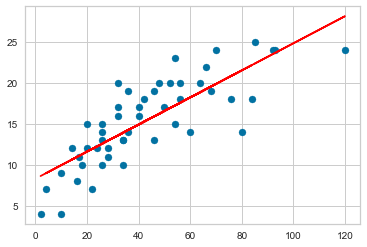

In [10]:
plt.scatter(X, y) # Scatter Plot
plt.plot(X, model.predict(X), color = 'red') # Regression Line

### Prediction

In [11]:
# Distância 22 pés

# ?model.predict

In [12]:
# Method 1
model.intercept_ + (model.coef_ * 22)

array([11.92639228])

In [13]:
# Method 2
X_predict = np.array(22).reshape(-1, 1)
model.predict(X_predict)

array([11.92639228])

In [14]:
# Method 1 == Method 2

### Residues

In [15]:
model._residues # Distância dos registros para a linha da regressão

478.02124836119646

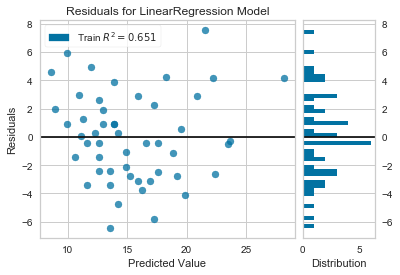

In [17]:
viewer = ResidualsPlot(model)
viewer.fit(X, y)
viewer.poof()